Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)
Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


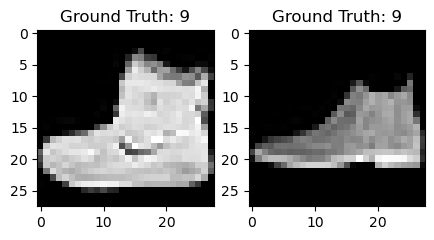

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training data shape: (48000, 28, 28, 1)
Validation data shape: (12000, 28, 28, 1)
Training label shape: (48000, 10)
Validation label shape: (12000, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyRe

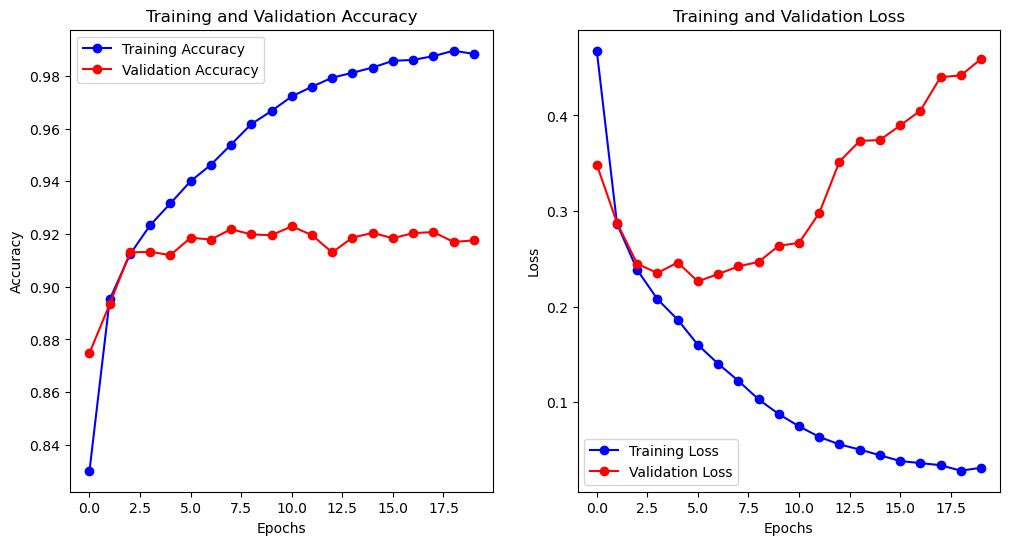

In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Load the dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print('Training data shape:', train_X.shape, train_Y.shape)
print('Testing data shape:', test_X.shape, test_Y.shape)

# Find the unique numbers in the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

# Visualize sample data
plt.figure(figsize=[5, 5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0, :, :], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0, :, :], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))
plt.show()

# Reshape data to fit the model
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# Normalize the data
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

# One-hot encode labels
train_Y_one_hot = to_categorical(train_Y, nClasses)
test_Y_one_hot = to_categorical(test_Y, nClasses)

# Display the change for one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

# Split the training data for validation
train_X, valid_X, train_label, valid_label = train_test_split(
    train_X, train_Y_one_hot, test_size=0.2, random_state=13
)

print('Training data shape:', train_X.shape)
print('Validation data shape:', valid_X.shape)
print('Training label shape:', train_label.shape)
print('Validation label shape:', valid_label.shape)

# Build the CNN model
batch_size = 64
epochs = 20
num_classes = nClasses

fashion_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(128, activation='linear'),
    LeakyReLU(alpha=0.1),
    Dense(num_classes, activation='softmax')
])

fashion_model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=['accuracy']
)

fashion_model.summary()

# Train the model
fashion_train = fashion_model.fit(
    train_X, train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
)

# Evaluate the model
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Plot training and validation accuracy and loss
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=[12, 6])

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
